Student Details

Name: **Abhijit Sinha**

ID: **18195067**

You may add two extra libraries: one to make a train-test split and one to perform a grid search

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 

# Using a global random seed for reproducible results when doing multiple runs
np.random.seed(5)

### Read the CSV files and store in X and y

In [2]:
# Function to read the CSV and plot the input data
def read_csv_file(filename):
    
    # Open the dataset_1 csv  file and import data
    with open(filename, 'r') as f1:
        first_line = f1.readline()
        data = np.loadtxt(fname=f1, delimiter=',')
   
    # Input samples stored in X
    X = data[:,1:3]
    # Target class stored in y
    y = data[:,-1]
    print(X.shape, y.shape)

    # Plot the input data
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
    plt.title(filename)
    plt.show()

    return X,y

### Read dataset 1

(10001, 2) (10001,)


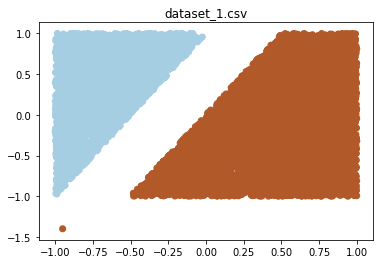

In [3]:
X1, y1 = read_csv_file(filename='dataset_1.csv')

### Read dataset 2

(10000, 2) (10000,)


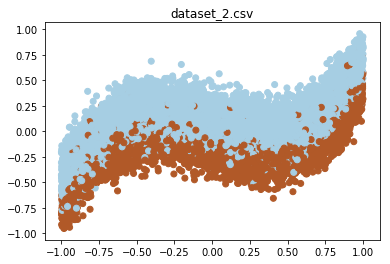

In [4]:
X2, y2 = read_csv_file(filename='dataset_2.csv')

### Read dataset 3

(10000, 2) (10000,)


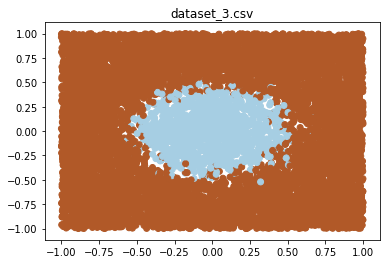

In [5]:
X3, y3 = read_csv_file(filename='dataset_3.csv')

### Shuffle and Split dataset 1, 2 and 3 into training and test set

In [6]:
def split_data(X, y, test_size):
    # Split the data into train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, stratify=y)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    return X_train, X_test, y_train, y_test

In [7]:
X1_train, X1_test, y1_train, y1_test = split_data(X1, y1, test_size=0.2)

(8000, 2) (2001, 2) (8000,) (2001,)


In [8]:
X2_train, X2_test, y2_train, y2_test = split_data(X2, y2, test_size=0.2)

(8000, 2) (2000, 2) (8000,) (2000,)


In [9]:
X3_train, X3_test, y3_train, y3_test = split_data(X3, y3, test_size=0.2)

(8000, 2) (2000, 2) (8000,) (2000,)


# Task 4
**[Task]:** Perform classification on dataset_1 using an SVM with linear kernel and experiment with the C-parameter to find the widest margin solution with a hard margin and a soft margin. 

**[Rubric]:** 
- Two plots for suitable values of the C-parameter showing the difference between a soft- and hard-margin SVM. 
- Numerical data with explanation to support the conclusions drawn from the graphs.


**[Learning]:** This task provides an insight in how SVM’s try to find a hyperplane (which in two dimensions is a line) which divides two classes with the maximum margin on either side of the hyperplane. You can use the C-parameter as a form of regularization; with this parameter you can allow the SVM to miss-classify certain points to allow a wider margin and thus, hopefully, a better performance out-of-sample.

In [10]:
# Function to plot the decision boundary

def plot_decision_boundary(X_train, y_train, classifier, label=''):
    # Sample code to plot SVM margin, 'gutters' and support vectors
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = classifier.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='b')
    plt.title("SVM decision boundary: " + label)
    

In [11]:
def get_eout(support_vector_size,number_of_training_samples):
    return support_vector_size/(number_of_training_samples -1)

C: 0.01	 CV score:0.999875	 Test score:1.0
C: 0.1	 CV score:0.999875	 Test score:1.0
C: 1	 CV score:0.999875	 Test score:1.0
C: 10	 CV score:1.0	 Test score:1.0
C: 100	 CV score:1.0	 Test score:1.0


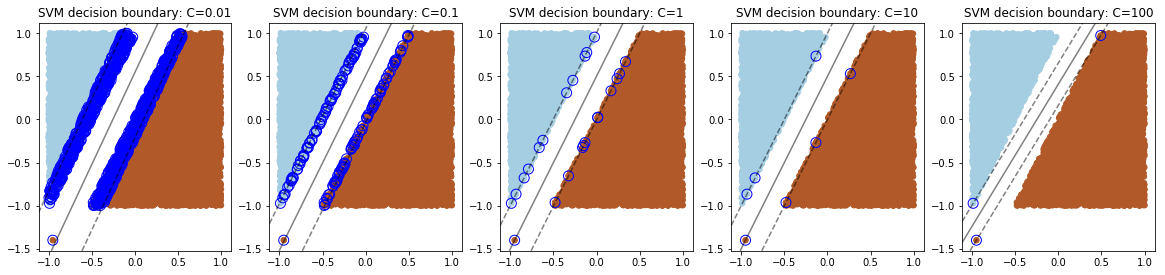

In [12]:
# Select a range of C values
C_values = [0.01, 0.1, 1, 10, 100]

# Add a figure for plotting the decision boundarys in subplots
f = plt.figure(figsize=(20,20))

# Loop to get the effect of C on dataset 1
for idx, c_val in enumerate(C_values):   
    # Set the hyperparameters and select a range of C values
    hyper_parameters = {'C': [c_val], 'kernel': ['linear']}

    # Using 10 fold cross-validation in grid search
    clf = GridSearchCV(svm.SVC(), hyper_parameters, cv=10, scoring='accuracy', n_jobs=-1)
    clf.fit(X1_train, y1_train)
    ax = f.add_subplot(1,len(C_values),idx+1)
    plot_decision_boundary(X1_train, y1_train, clf.best_estimator_, label='C={}'.format(c_val))

    y_pred = clf.best_estimator_.predict(X1_test)
    score = clf.best_estimator_.score(X1_test, y1_test)
    print("C: {}\t CV score:{}\t Test score:{}".format(c_val, clf.best_score_, score))


## Observations of SVM margins based on C values:
The C parameter tells the SVM optimization how much we want to avoid misclassifying each training example. By choosing C appropriately we can get a large margin hyperplane with a small amount of margin violation. This will also lead to a small VC dimension

##### Soft Margin for Small C
Small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. A very small C value can lead to underfitting. For small values of C we can see one data point is misclassfied.

##### Hard Margin for Large C
Large value of C will cause the optimizer to look for a smaller-margin separating hyperplane if that hyperplane does a better job of getting all the training points classified correctly. A large C value can thus lead to the over-fitting problem as it will try to fit the noise in the data as well.

References: https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel

# Task 5
**[Task]:** Explore the provided data sets (dataset_1, dataset_2 and dataset_3) using Support Vector Machines and choose suitable kernels and hyper-parameters.

**[Rubric]:** 
- Suitable kernels and hyper parameters  proposed for all datasets. 
- Proper use of train and test data and plots of the SVM hyperplane. 
- Evidence of a structured approach to the selection of hyper-parameters.

**[Learning]:** This task provides an insight in how a kernel can allow the SVM (a linear classifier) to be used on non-linearly separable data sets by casting the data in some higher dimensional space as determined by the kernel you choose. In addition to choosing a suitable kernel, you will find that tuning the hyper-parameters of the SVM is important. Take some time to explore various kernels and values of the hyper-parameters to get a feel for how they affect performance and then use a structured approach to arrive at your final conclusions. Take into consideration the out-of-sample error (simulated and based on theory (see lecture 14 from Learning from Data)). 

For this task you may import two extra libraries: one to create train-test splits and one to perform a grid search of your choosing.

Reference Articles:
- https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
- https://data-flair.training/blogs/svm-kernel-functions/

In [13]:
# Function to optimize SVM classfier for multiple datasets

def optimize_SVM(X_train, y_train, X_test, y_test, title=''):
    
    # Set the hyperparameters and select a range of C values and kernels for cross-valdiation
    
    # Set the parameters by cross-validation
    tuned_parameters = [{'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]},
                        {'kernel': ['rbf', 'poly'],
                         'gamma': [0.001, 0.01, 0.1, 1, 'auto'],
                         'C': [0.01, 0.1, 1, 10, 100],
                         #'degree': [1, 2, 3, 4, 5]
                        }]

    # Using a SVM base classifier
    SVM_clf = svm.SVC()

    # Using 10 fold cross-validation in grid search
    clf = GridSearchCV(SVM_clf, tuned_parameters, cv=10, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train, y_train)
    
    # Calculate the Expected Error based on the number of Support Vectors
    nb_support_vectors = len(clf.best_estimator_.support_vectors_)
    nb_training_samples = len(X_train)
    e_out = nb_support_vectors/(nb_training_samples -1)
    
    print("**"*40)
    print("Number of Support Vectors  :", nb_support_vectors)
    print("Number of Training Samples :", nb_training_samples)
    print("Expected E_out :", e_out)
    print("**"*40)
    
    # Plot the SVM descision boundary
    plot_decision_boundary(X_train, y_train, clf.best_estimator_, label=title)
    
    # Make predictions on test data
    y_pred = clf.best_estimator_.predict(X_test)
    # Test accuracy score on classiffiaction
    test_score = clf.best_estimator_.score(X_test, y_test)
    
    print("Best SVM parameters :", clf.best_params_)
    print("Best CV score :", clf.best_score_)
    print("Test data score", test_score)
    print("**"*40)
    
    return clf

********************************************************************************
Number of Support Vectors  : 7
Number of Training Samples : 8000
Expected E_out : 0.0008751093886735842
********************************************************************************
Best SVM parameters : {'kernel': 'linear', 'C': 10}
Best CV score : 1.0
Test data score 1.0
********************************************************************************


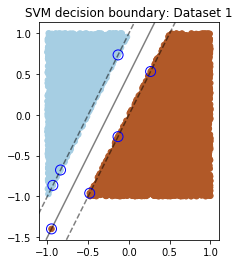

In [14]:
data1_clf = optimize_SVM(X1_train, y1_train, X1_test, y1_test, title='Dataset 1')

********************************************************************************
Number of Support Vectors  : 2739
Number of Training Samples : 8000
Expected E_out : 0.3424178022252782
********************************************************************************
Best SVM parameters : {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
Best CV score : 0.866
Test data score 0.865
********************************************************************************


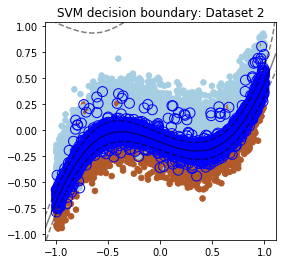

In [15]:
data2_clf = optimize_SVM(X2_train, y2_train, X2_test, y2_test, title='Dataset 2')

********************************************************************************
Number of Support Vectors  : 911
Number of Training Samples : 8000
Expected E_out : 0.11388923615451932
********************************************************************************
Best SVM parameters : {'kernel': 'rbf', 'gamma': 1, 'C': 0.1}
Best CV score : 0.988875
Test data score 0.984
********************************************************************************


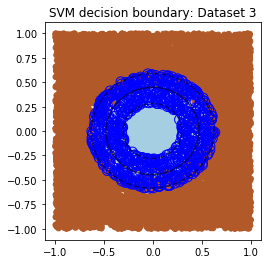

In [16]:
data3_clf = optimize_SVM(X3_train, y3_train, X3_test, y3_test, title='Dataset 3')

### Observations:

#### TODO

The dataset 1 is linearly separable and the SVM selects a linear kernel in Gris Search. In dataset 2 and 3, the data is non-linear and selects a non-linear kernel. The Gaussian RBF kernel works best in the dataset 2 and 3. 

The kernel SVM projects the non-linearly separable data lower dimensions to linearly separable data in higher dimensions in such a way that data points belonging to different classes are allocated to different dimensions.

In case of the Polynomial Kernel, we have to pass a value for the degree parameter of the SVC class. This is basically is the degree of the polynomial.

It is important to note that sigmoid function returns two values, 0 and 1, therefore it is more suitable for binary classification problems.
